#### Import libraries

In [2]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

#### Helper function to superimpose text on image 

In [3]:
def display_cover(top,bottom ):
    """This fucntoin
    """
    import requests
    
    name='album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title, 
    # run "% ls /usr/share/fonts/truetype/dejavu" in a cell to see what else is available,
    # or download your own .ttf fonts!
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) #25pt font
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20) # 20pt font

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

#### Display cover demo

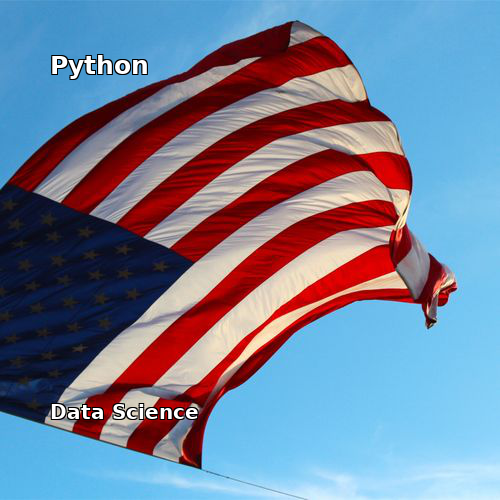

In [4]:
MyImage = display_cover(top = 'Python', bottom = 'Data Science')
MyImage.save('sample-out.png')
IPythonImage(filename='sample-out.png')

#### Loading random pages from Wikipedia

In [7]:
import requests
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'
raw_random_wikipedia_page = requests.get(wikipedia_link)
page = raw_random_wikipedia_page.text
print(page)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Thyrogonia - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Thyrogonia","wgTitle":"Thyrogonia","wgCurRevisionId":853672473,"wgRevisionId":853672473,"wgArticleId":21865157,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles lacking in-text citations from August 2018","All articles lacking in-text citations","Articles with 'species' microformats","All stub articles","Arctiinae","Arctiinae stubs"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],

#### Extracting the Title of the Article

In [8]:
from bs4 import BeautifulSoup

# Cleans html file
soup = BeautifulSoup(page, 'html.parser')
title = soup.title.string
title

'Thyrogonia - Wikipedia'

In [9]:
band_title = str.replace(title, ' - Wikipedia', '')
band_title

'Thyrogonia'

Run the following again to have another random title extract.

In [10]:
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'
raw_random_wikipedia_page = requests.get(wikipedia_link)
page = raw_random_wikipedia_page.text

from bs4 import BeautifulSoup

soup = BeautifulSoup(page, 'html.parser')
title = soup.title.string
title

'Wanetsi - Wikipedia'

In [11]:
album_title = str.replace(title, ' - Wikipedia', '')
album_title

'Wanetsi'

In [12]:
print("1st random title: ", band_title)
print("2nd random title: ", album_title)

1st random title:  Thyrogonia
2nd random title:  Wanetsi


#### Displaying on an image cover

In [14]:
MyImage = display_cover(top = band_title, bottom = album_title)

In [15]:
MyImage.save('random_cover-out.png')

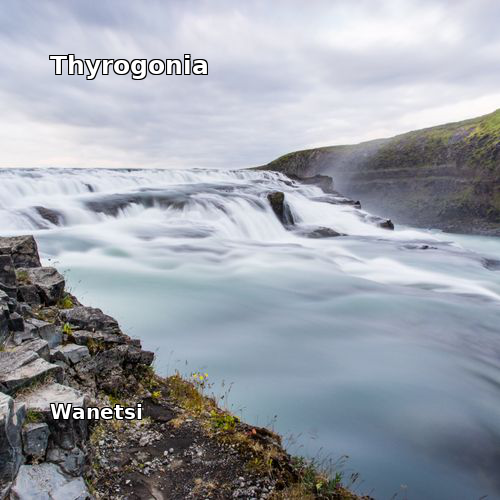

In [16]:
IPythonImage(filename='random_cover-out.png')

Courtesy of IBM Coursera Assignment